In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load dataset
df = pd.read_csv("./data/accdata.csv")

# Combine Date and Time (optional but useful)
df['timestamp'] = pd.to_datetime(df['Date'] + " " + df['Time'])

# Keep only sensor values
df = df[['a', 'b', 'c']]

print(df.head())
print(df.shape)


          a         b         c
0 -1.838747  3.543418  9.126697
1  1.110910  1.810017  9.634268
2  8.829816  0.833182  4.663905
3 -0.852336 -0.124498  9.787497
4 -0.900220 -0.095768  9.835381
(27937, 3)


In [ ]:
# Feature Extraction using Sliding Window

WINDOW_SIZE = 100
features = []

for i in range(0, len(df) - WINDOW_SIZE, WINDOW_SIZE):
    window = df.iloc[i:i + WINDOW_SIZE]

    magnitude = np.sqrt(
        window['a']**2 + window['b']**2 + window['c']**2
    )

    feature_vector = {
        'a_mean': window['a'].mean(),
        'a_std': window['a'].std(),
        'a_max': window['a'].max(),

        'b_mean': window['b'].mean(),
        'b_std': window['b'].std(),
        'b_max': window['b'].max(),

        'c_mean': window['c'].mean(),
        'c_std': window['c'].std(),
        'c_max': window['c'].max(),

        'mag_mean': magnitude.mean(),
        'mag_std': magnitude.std(),
        'mag_energy': np.sum(magnitude**2)
    }

    features.append(feature_vector)

X = pd.DataFrame(features)
print("Feature shape:", X.shape)


Feature shape: (279, 12)


In [5]:
X.head()

,a_mean,a_std,a_max,b_mean,b_std,b_max,c_mean,c_std,c_max,mag_mean,mag_std,mag_energy
0,0.168456,1.767429,8.973468,0.718739,1.825289,7.240066,9.448669,1.062484,9.940725,9.864289,0.163986,9733.082448
1,0.631926,7.368753,9.854534,0.101275,1.046717,2.738967,5.454877,3.402426,12.832921,9.812655,0.424028,9646.620074
2,0.934696,2.901829,8.456321,1.169232,2.297407,5.698200,7.345315,5.299418,11.109096,9.875912,0.160382,9755.911170
3,2.668865,3.402079,9.107543,4.601560,3.516717,9.653421,-0.206380,6.673142,10.084377,9.802797,0.181169,9612.732924
4,0.840389,1.942089,6.406884,2.151118,3.302633,10.007763,8.651591,2.026905,11.492168,9.913520,0.714414,9878.316681


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Choose number of classes
NUM_CLASSES = 3

kmeans = KMeans(n_clusters=NUM_CLASSES, random_state=42)
y = kmeans.fit_predict(X_scaled)



Generated class distribution:
1    189
2     57
0     33
Name: count, dtype: int64


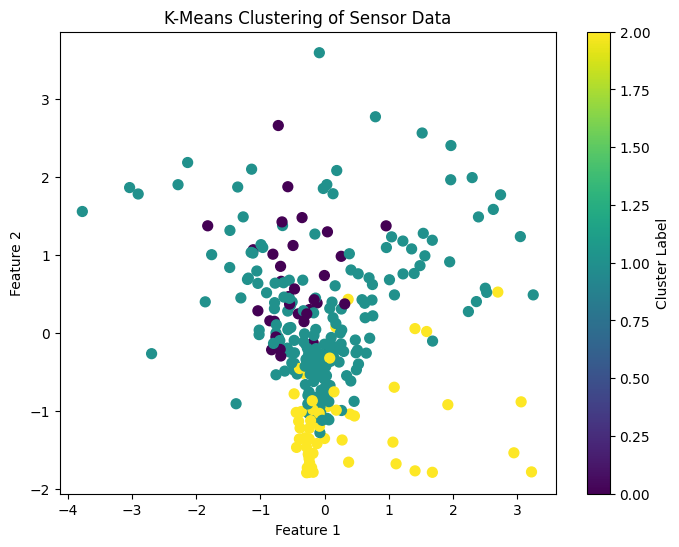

In [11]:
print("Generated class distribution:")
print(pd.Series(y).value_counts())

# Visual inspection of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=50)
plt.title('K-Means Clustering of Sensor Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()	

In [ ]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Classifier:
Accuracy: 0.9285714285714286


In [ ]:
# Support Vector Machine Classifier
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_pred))

Support Vector Machine Classifier:
Accuracy: 0.9464285714285714


In [ ]:
# Logistic Regression Classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Classifier:
Accuracy: 0.9821428571428571


In [ ]:
# Detailed classification reports
models = {
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    "Logistic Regression": lr_pred
}

for name, preds in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))



Random Forest
Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95        38
           2       1.00      0.73      0.84        11

    accuracy                           0.93        56
   macro avg       0.97      0.86      0.91        56
weighted avg       0.94      0.93      0.93        56


SVM
Accuracy: 0.9464285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.93      1.00      0.96        38
           2       1.00      0.73      0.84        11

    accuracy                           0.95        56
   macro avg       0.98      0.91      0.93        56
weighted avg       0.95      0.95      0.94        56


Logistic Regression
Accuracy: 0.9821428571428571
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
 

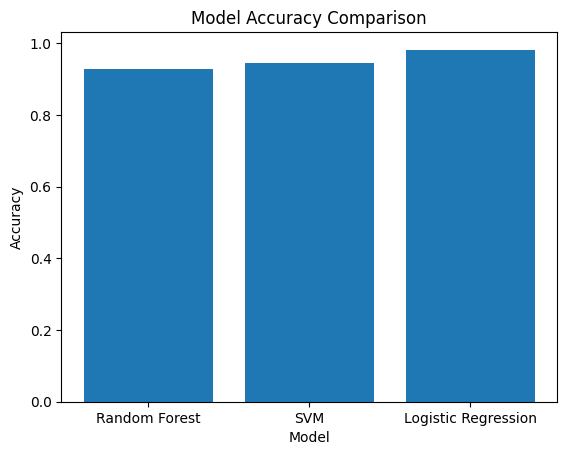

In [ ]:
# Model Accuracy Comparison

accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, lr_pred)
]

plt.figure()
plt.bar(models.keys(), accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()
